In [1]:
!kaggle datasets download -d headsortails/us-election-2020-presidential-debates

100%|███████████████████████████████████████▊| 437M/439M [00:27<00:00, 16.9MB/s]
100%|████████████████████████████████████████| 439M/439M [00:27<00:00, 16.5MB/s]


In [2]:
# unzip and put it in the data_input folder
!unzip us-election-2020-presidential-debates.zip -d data_input

Archive:  us-election-2020-presidential-debates.zip
  inflating: data_input/us_election_2020_1st_presidential_debate.csv  
  inflating: data_input/us_election_2020_1st_presidential_debate.mp3  
  inflating: data_input/us_election_2020_1st_presidential_debate.txt  
  inflating: data_input/us_election_2020_2nd_presidential_debate.csv  
  inflating: data_input/us_election_2020_2nd_presidential_debate.mp3  
  inflating: data_input/us_election_2020_2nd_presidential_debate.txt  
  inflating: data_input/us_election_2020_biden_town_hall.csv  
  inflating: data_input/us_election_2020_biden_town_hall.mp3  
  inflating: data_input/us_election_2020_biden_town_hall.txt  
  inflating: data_input/us_election_2020_trump_town_hall.csv  
  inflating: data_input/us_election_2020_trump_town_hall.mp3  
  inflating: data_input/us_election_2020_trump_town_hall.txt  
  inflating: data_input/us_election_2020_vice_presidential_debate.csv  
  inflating: data_input/us_election_2020_vice_presidential_debate.mp3  


# Introduction

This time around, im trying to analysis based on debates between trump and biden.

In [3]:
# import library

import pandas as pd
import numpy as np

import nltk
import string
import regex as re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# For vis
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
first_debate_df = pd.read_csv('data_input/us_election_2020_1st_presidential_debate.csv')
second_debate_df = pd.read_csv('data_input/us_election_2020_2nd_presidential_debate.csv')

In [5]:
first_debate_df.head()

,speaker,minute,text
0,Chris Wallace,01:20,Good evening from the Health Education Campus ...
1,Chris Wallace,02:10,This debate is being conducted under health an...
2,Vice President Joe Biden,02:49,"How you doing, man?"
3,President Donald J. Trump,02:51,How are you doing?
4,Vice President Joe Biden,02:51,I’m well.


In [6]:
second_debate_df.head()

,speaker,minute,text
0,Kristen Welker,00:18,"Good evening, everyone. Good evening. Thank yo..."
1,Donald Trump,07:37,How are you doing? How are you?
2,Kristen Welker,07:58,And I do want to say a very good evening to bo...
3,Kristen Welker,08:27,The goal is for you to hear each other and for...
4,Kristen Welker,09:03,… during this next stage of the coronavirus cr...


In [9]:
first_debate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   speaker  789 non-null    object
 1   minute   788 non-null    object
 2   text     789 non-null    object
dtypes: object(3)
memory usage: 18.6+ KB


In [10]:
second_debate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   speaker  512 non-null    object
 1   minute   512 non-null    object
 2   text     512 non-null    object
dtypes: object(3)
memory usage: 12.1+ KB


In [7]:
first_debate_df.isnull().sum()

speaker    0
minute     1
text       0
dtype: int64

In [28]:
# find the null value in the first debate
first_debate_df[first_debate_df['minute'].isnull()]

,speaker,minute,text,word_count
179,Chris Wallace:,NaN,"Okay, gentlemen, gentlemen. Let me move on to ...",112


In [30]:
first_debate_df.iloc[175:185]

,speaker,minute,text,word_count
175,Vice President Joe Biden,23:33,And there was no one … We didn’t shut down the...,90
176,President Donald J. Trump,23:57,"We would have lost far more people, far more p...",21
177,Vice President Joe Biden,24:03,His own CDC Director says we could lose as man...,77
178,President Donald J. Trump,24:25,"You don’t trust Johnson & Johnson, Pfizer?",7
179,Chris Wallace:,NaN,"Okay, gentlemen, gentlemen. Let me move on to ...",112
180,President Donald J. Trump,00:15,"Well, I’ve spoken to the companies and we can ...",31
181,Vice President Joe Biden,00:22,God.,1
182,President Donald J. Trump,00:23,It is a very political thing. I’ve spoken to P...,61
183,Chris Wallace,00:38,So you’re suggesting that the head of your Ope...,13
184,President Donald J. Trump,00:42,"I disagree with him. No, I disagree with both ...",38


In [31]:
# adding the missing value in minute into 00:00
first_debate_df['minute'].fillna('00:00', inplace=True)

In [33]:
first_debate_df.iloc[175:185]

,speaker,minute,text,word_count
175,Vice President Joe Biden,23:33,And there was no one … We didn’t shut down the...,90
176,President Donald J. Trump,23:57,"We would have lost far more people, far more p...",21
177,Vice President Joe Biden,24:03,His own CDC Director says we could lose as man...,77
178,President Donald J. Trump,24:25,"You don’t trust Johnson & Johnson, Pfizer?",7
179,Chris Wallace:,00:00,"Okay, gentlemen, gentlemen. Let me move on to ...",112
180,President Donald J. Trump,00:15,"Well, I’ve spoken to the companies and we can ...",31
181,Vice President Joe Biden,00:22,God.,1
182,President Donald J. Trump,00:23,It is a very political thing. I’ve spoken to P...,61
183,Chris Wallace,00:38,So you’re suggesting that the head of your Ope...,13
184,President Donald J. Trump,00:42,"I disagree with him. No, I disagree with both ...",38


In [32]:
first_debate_df.isnull().sum()

speaker       0
minute        0
text          0
word_count    0
dtype: int64

In [8]:
second_debate_df.isnull().sum()

speaker    0
minute     0
text       0
dtype: int64

In [17]:
# lets see the text column
x = first_debate_df['text'].loc[0]
b = second_debate_df['text'].loc[0]
# find how many words in the text
y = len(x.split())

print(x)
print(y)

Good evening from the Health Education Campus of Case Western Reserve University and the Cleveland Clinic. I’m Chris Wallace of Fox News and I welcome you to the first of the 2020 Presidential Debates between President Donald J. Trump and former Vice President Joe Biden. This debate is sponsored by the Commission on Presidential debates. The Commission has designed the format, six roughly 15 minute segments with two minute answers from each candidate to the first question, then open discussion for the rest of each segment. Both campaigns have agreed to these rules. For the record, I decided the topics and the questions in each topic. I can assure you none of the questions has been shared with the Commission or the two candidates.
124


In [18]:
first_debate_df['word_count'] = first_debate_df['text'].apply(lambda x: len(str(x).split(" ")))
first_debate_df.head()

,speaker,minute,text,word_count
0,Chris Wallace,01:20,Good evening from the Health Education Campus ...,124
1,Chris Wallace,02:10,This debate is being conducted under health an...,102
2,Vice President Joe Biden,02:49,"How you doing, man?",4
3,President Donald J. Trump,02:51,How are you doing?,4
4,Vice President Joe Biden,02:51,I’m well.,2


In [19]:
second_debate_df['word_count'] = second_debate_df['text'].apply(lambda b: len(str(b).split(" ")))
second_debate_df.head()

,speaker,minute,text,word_count
0,Kristen Welker,00:18,"Good evening, everyone. Good evening. Thank yo...",258
1,Donald Trump,07:37,How are you doing? How are you?,7
2,Kristen Welker,07:58,And I do want to say a very good evening to bo...,95
3,Kristen Welker,08:27,The goal is for you to hear each other and for...,115
4,Kristen Welker,09:03,… during this next stage of the coronavirus cr...,12


In [26]:
## find the word count from bigges to smallest
sorted_df = first_debate_df.sort_values(by='word_count', ascending=False)
sorted_df = sorted_df.reset_index(drop=True)
print(sorted_df[['word_count','text']].head())

   word_count                                               text
0         199  I don’t think you have any law enforcement. Yo...
1         192  Gas and oil because the heat will not be going...
2         192  Show up and vote. You will determine the outco...
3         190  He’s absolutely wrong, number one. Number two,...
4         185  Prepare to let people vote. They should go to ...


In [34]:
first_debate_df['speaker'].unique()

array(['Chris Wallace', 'Vice President Joe Biden',
       'President Donald J. Trump', 'Chris Wallace:'], dtype=object)

In [35]:
second_debate_df['speaker'].unique()

array(['Kristen Welker', 'Donald Trump', 'Joe Biden'], dtype=object)

In [36]:
first_debate_df.loc[first_debate_df.speaker.str.contains('Chris Wallace:'), 'speaker'] = 'Chris Wallace'

In [37]:
first_debate_df['speaker'].unique()

array(['Chris Wallace', 'Vice President Joe Biden',
       'President Donald J. Trump'], dtype=object)

In [38]:
# split by speaker
df_CW = first_debate_df[first_debate_df.speaker=='Chris Wallace']
df_JB = first_debate_df[first_debate_df.speaker=='Vice President Joe Biden']
df_DT = first_debate_df[first_debate_df.speaker=='President Donald J. Trump']

In [39]:
# convert to strings
text_CW = " ".join(txt for txt in df_CW.text)
text_DT = " ".join(txt for txt in df_DT.text)
text_JB = " ".join(txt for txt in df_JB.text)

# compare total text lengths
print('Length of text - Chris Wallace             : ', len(text_CW))
print('Length of text - President Donald J. Trump : ', len(text_DT))
print('Length of text - Vice President Joe Biden  : ', len(text_JB))

Length of text - Chris Wallace             :  26702
Length of text - President Donald J. Trump :  38791
Length of text - Vice President Joe Biden  :  35370


In [41]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [40]:
stopwords = set(stopwords.words('english'))

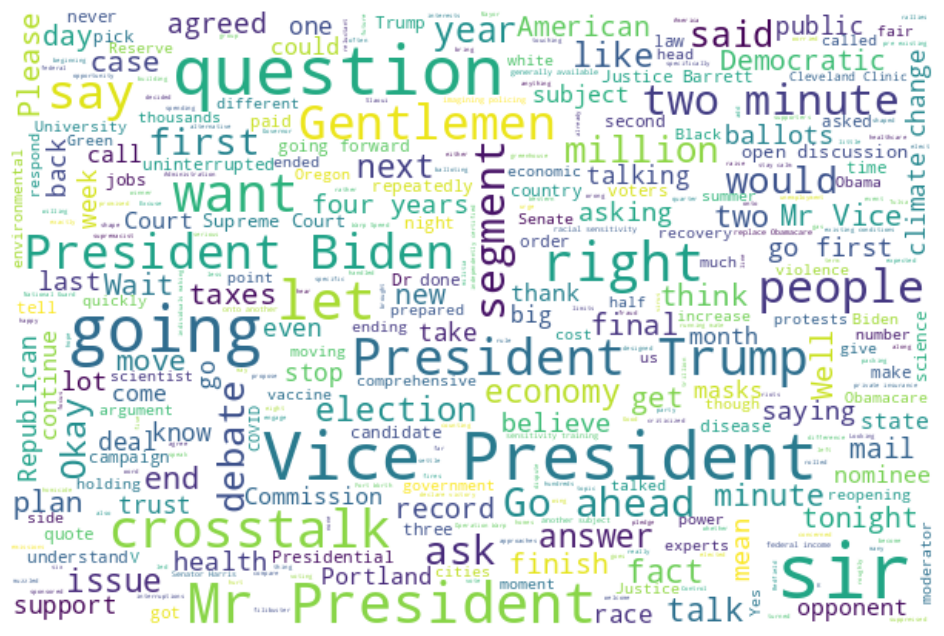

In [42]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      background_color="white").generate(text_CW)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

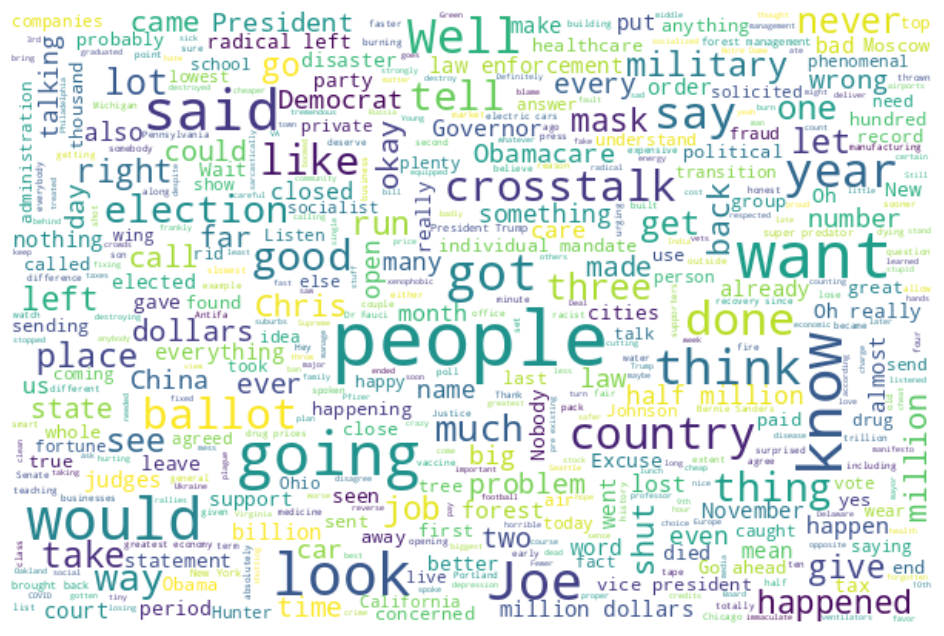

In [43]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                      width = 600, height = 400,
                      background_color="white").generate(text_DT)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

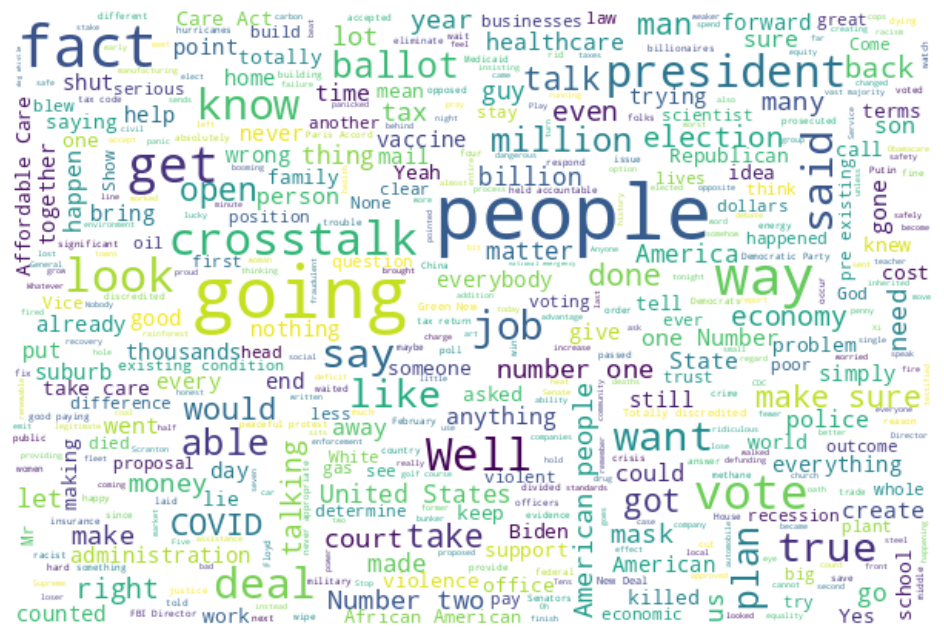

In [44]:
# wordlcloud for joe biden

wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                        width = 600, height = 400,
                        background_color="white").generate(text_JB)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [45]:
# standard stopwords
my_stopwords = set(nltk.corpus.stopwords.words('english'))
# additional stopwords
my_stopwords = my_stopwords.union({"'s","'ll","'re","n't","'ve","'m"})

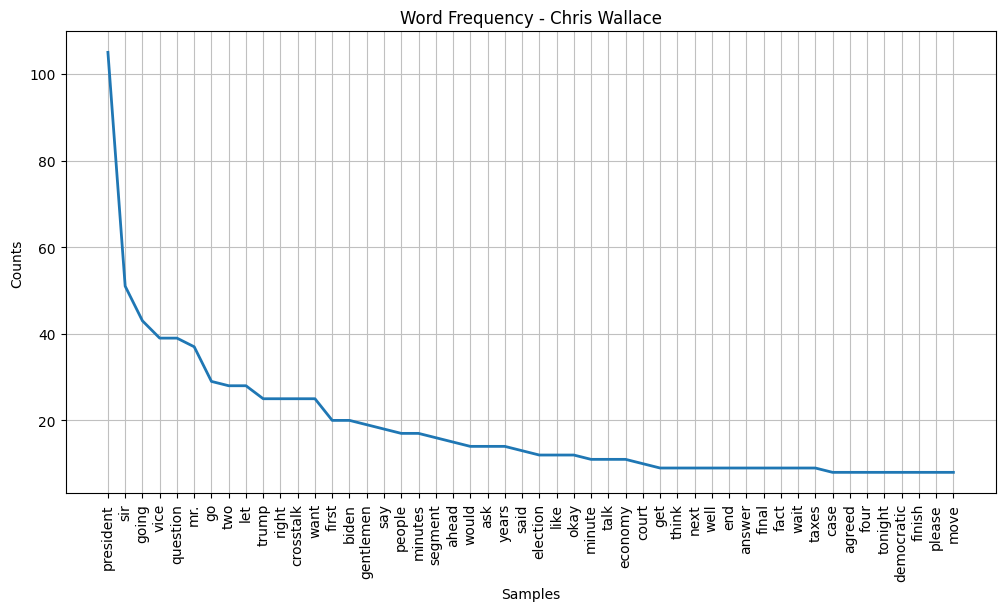

<Axes: title={'center': 'Word Frequency - Chris Wallace'}, xlabel='Samples', ylabel='Counts'>

In [46]:
# lower case
text = text_CW.lower()
# tokenize text
words = nltk.word_tokenize(text)
# remove single characters
words = [word for word in words if len(word) > 1]
# remove stopwords
words = [word for word in words if word not in my_stopwords]
# count word frequencies
word_freqs = nltk.FreqDist(words)
# plot word frequencies
plt.rcParams['figure.figsize'] = [12, 6]
plt.title('Word Frequency - Chris Wallace')
word_freqs.plot(50)

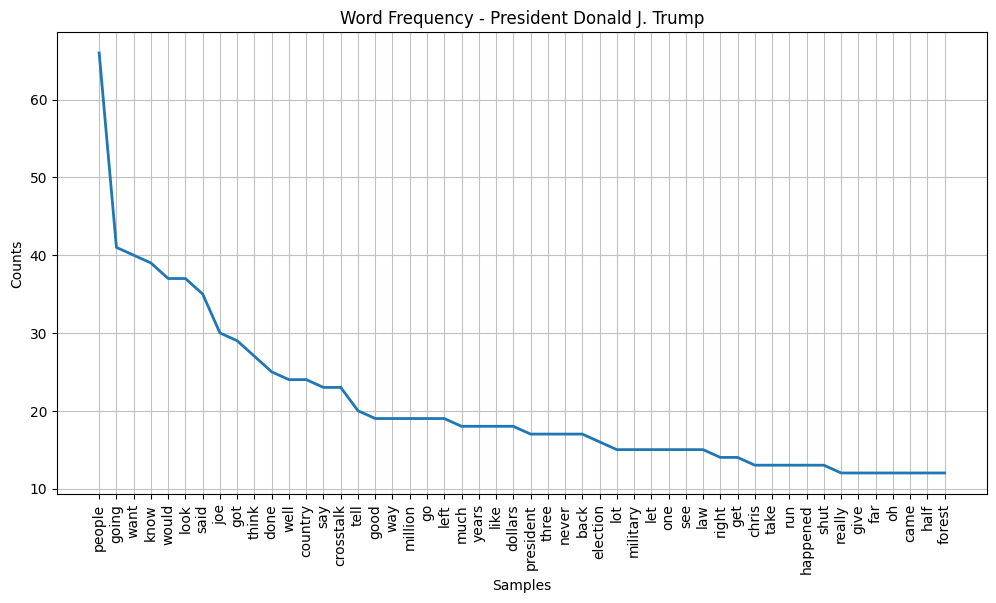

<Axes: title={'center': 'Word Frequency - President Donald J. Trump'}, xlabel='Samples', ylabel='Counts'>

In [47]:
# President Donald J. Trump

# lower case
text = text_DT.lower()
# tokenize text
words = nltk.word_tokenize(text)
# remove single characters
words = [word for word in words if len(word) > 1]
# remove stopwords
words = [word for word in words if word not in my_stopwords]
# count word for frequencies
word_freqs = nltk.FreqDist(words)
# plot word frequencies
plt.rcParams['figure.figsize'] = [12, 6]
plt.title('Word Frequency - President Donald J. Trump')
word_freqs.plot(50)


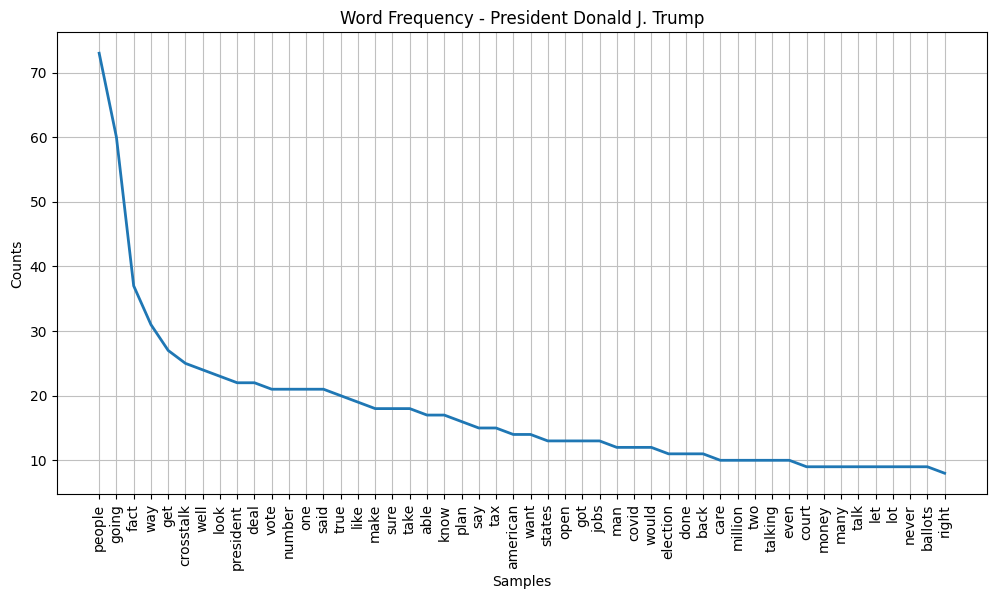

<Axes: title={'center': 'Word Frequency - President Donald J. Trump'}, xlabel='Samples', ylabel='Counts'>

In [48]:
# President Donald J. Trump

# lower case
text = text_JB.lower()
# tokenize text
words = nltk.word_tokenize(text)
# remove single characters
words = [word for word in words if len(word) > 1]
# remove stopwords
words = [word for word in words if word not in my_stopwords]
# count word for frequencies
word_freqs = nltk.FreqDist(words)
# plot word frequencies
plt.rcParams['figure.figsize'] = [12, 6]
plt.title('Word Frequency - President Donald J. Trump')
word_freqs.plot(50)


In [57]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [53]:
sentiment = sentiment.polarity_scores(text_CW)
sentiment_val = sentiment['compound']
sentiment.pop('compound', None)
print('CW:split',sentiment)
print('CW : sentiment score=', sentiment_val)

CW:split {'neg': 0.064, 'neu': 0.835, 'pos': 0.101}
CW : sentiment score= 0.9994


In [56]:
sentiment = sentiment.polarity_scores(text_DT)
sentiment_val = sentiment['compound']
sentiment.pop('compound', None)
print('CW:split',sentiment)
print('CW : sentiment score=', sentiment_val)

CW:split {'neg': 0.095, 'neu': 0.787, 'pos': 0.118}
CW : sentiment score= 0.9992


In [58]:
sentiment = sentiment.polarity_scores(text_JB)
sentiment_val = sentiment['compound']
sentiment.pop('compound', None)
print('CW:split',sentiment)
print('CW : sentiment score=', sentiment_val)

CW:split {'neg': 0.107, 'neu': 0.78, 'pos': 0.114}
CW : sentiment score= -0.9726
